# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [601]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
import censusgeocode as cg


sns.set(style="darkgrid")

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [602]:
df = pd.read_csv("kc_house_data_train.csv", index_col="Unnamed: 0")

In [603]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.9+ MB


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [516]:
df.yr_renovated.value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [517]:
print(df.columns)
ignore_cols = ['id', 'price', 'date']
explore_cols = [x for x in df.columns if x not in ignore_cols]

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


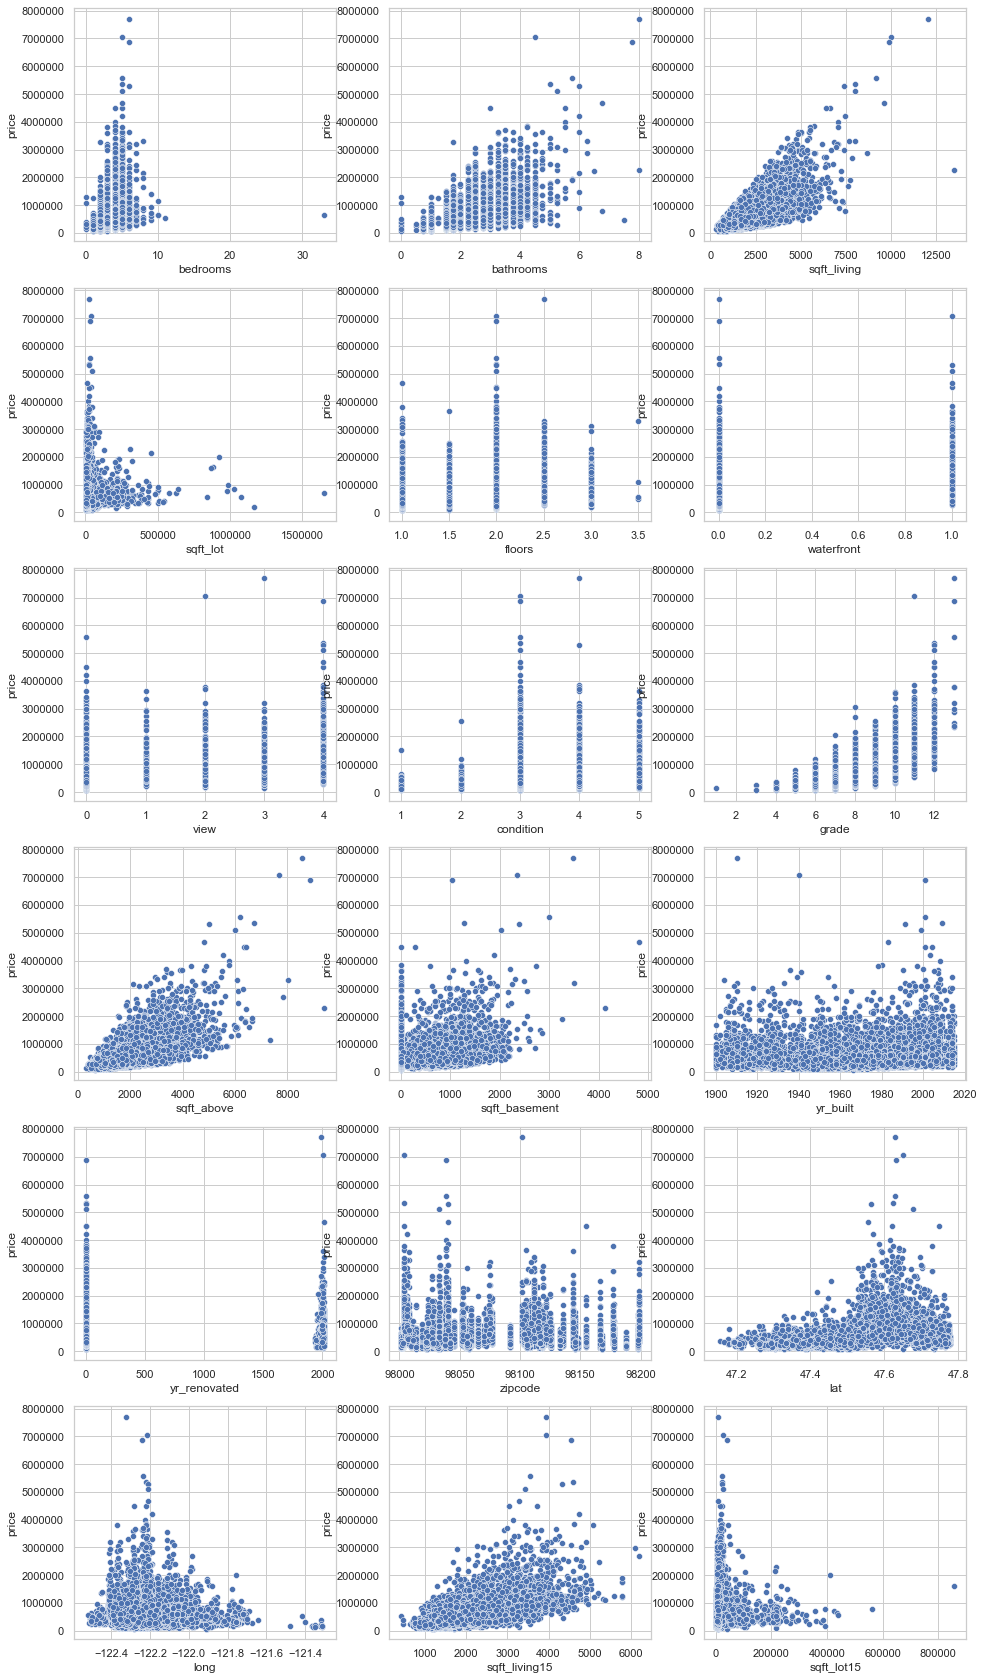

In [146]:
# fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,30))

# for i, column in enumerate(explore_cols):
#     sns.scatterplot(data = df, x=column,y='price', ax=axes[i//3, i%3])

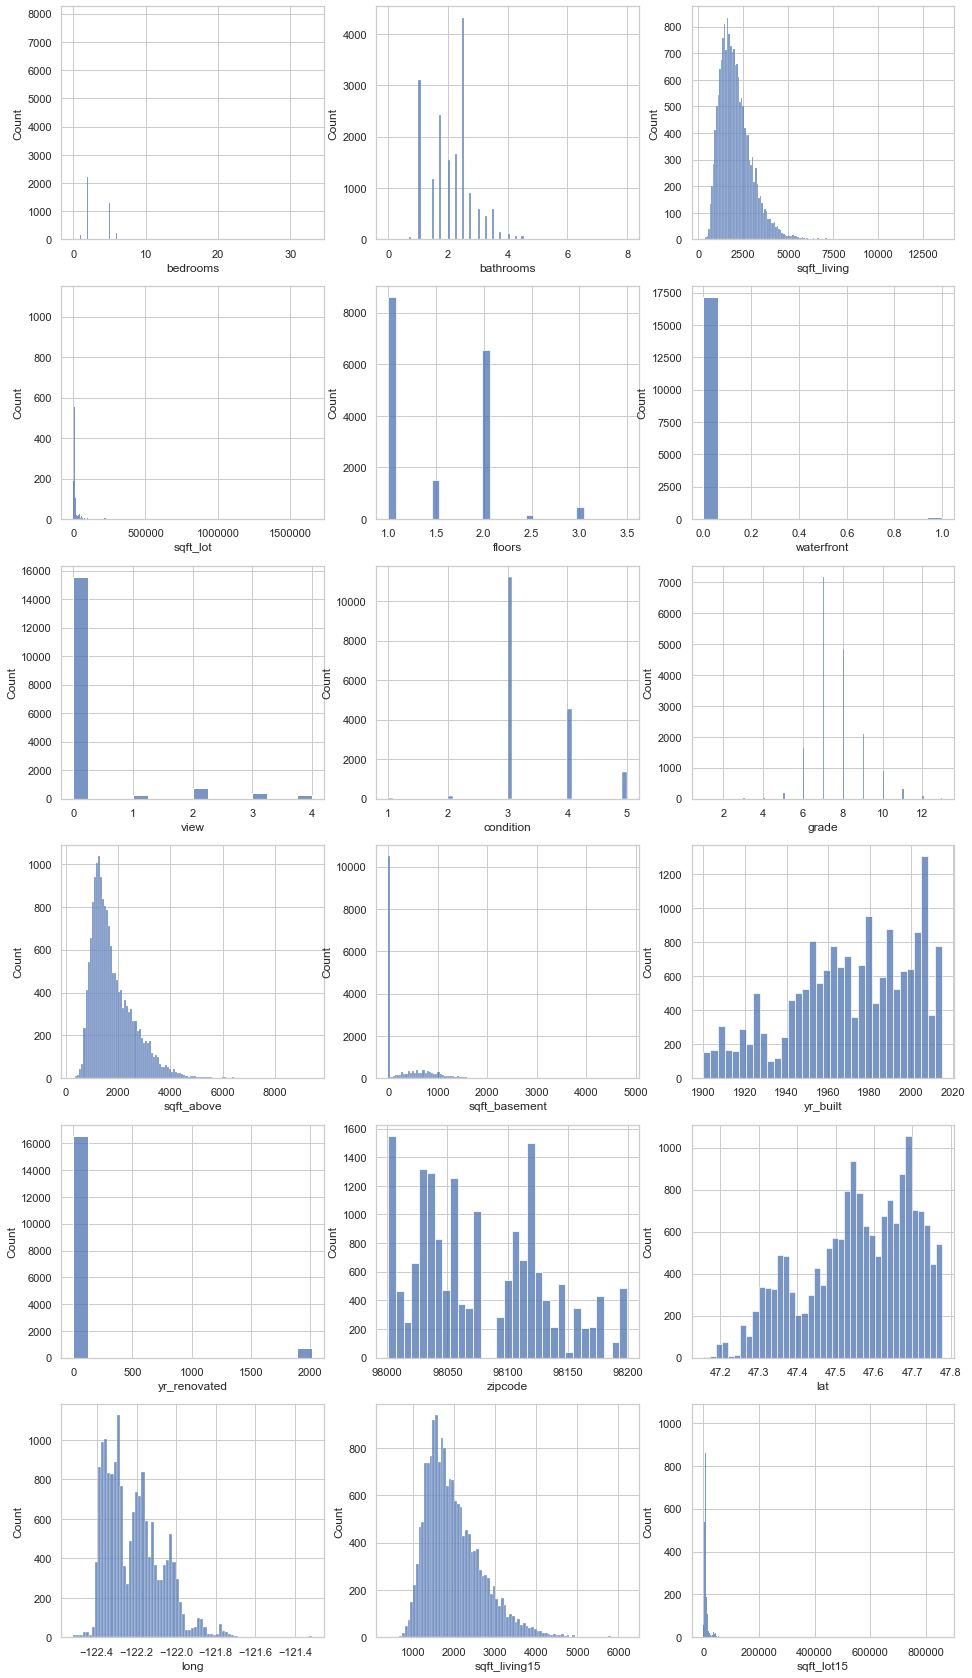

In [147]:
# fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,30))

# for i, column in enumerate(explore_cols):
#     sns.histplot(data = df, x=column, ax=axes[i//3, i%3])

In [328]:
df.zipcode.value_counts()

98052    474
98115    465
98103    461
98038    455
98117    437
        ... 
98102     80
98010     74
98024     65
98148     43
98039     42
Name: zipcode, Length: 70, dtype: int64

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [605]:
df[df['bedrooms'] == 0]
df.iloc[483] = {'bedrooms': 4, 'bathrooms': 2.5}

ValueError: Must have equal len keys and value when setting with an iterable

In [330]:
np.log(df['sqft_above']) 

0        7.635304
1        7.512071
2        8.234830
3        8.425078
4        7.843849
           ...   
17285    7.610853
17286    7.170120
17287    6.956545
17288    7.170120
17289    7.192934
Name: sqft_above, Length: 17290, dtype: float64

In [331]:
df[df.sqft_living.isin(range(13000,14000))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3275,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [518]:
# df['bedrooms'] = df['bedrooms'].replace({0: df.bedrooms.median()})
df['bedrooms'] = df['bedrooms'].replace({11:4, 33:3})
# df['bathrooms'] = df['bathrooms'].replace({0: df.bathrooms.median()})

In [333]:
# fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,25))

# for i, column in enumerate(explore_cols):
#     sns.boxplot(data = df, x=column, ax=axes[i//3, i%3])

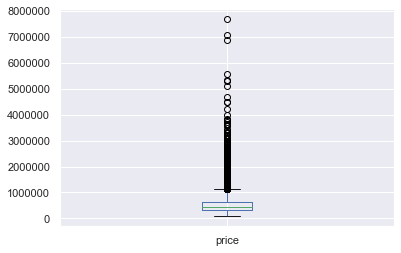

In [334]:
df.price.plot.box()

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [519]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [520]:
df['old_charm'] = (2020-df['yr_built'])*df['grade']

In [521]:
len(set(df.zipcode))

70

In [522]:
def add_census_tract(dataframe):
    result = cg.coordinates(x=df.loc[i]['long'] , y=df.loc[i]['lat'])
    return result['2010 Census Blocks'][0]['TRACT'])



SyntaxError: invalid syntax (<ipython-input-522-266bc2d104f3>, line 3)

In [523]:
print(f'unique tracts: {len(set(tracts))}, total items: {len(tracts)}')

unique tracts: 147, total items: 197


In [524]:
result = cg.coordinates(x=df.loc[7]['long'] , y=df.loc[6]['lat'])
result

{'2010 Census Blocks': [{'SUFFIX': '',
   'GEOID': '530330058014038',
   'CENTLAT': '+47.6591722',
   'BLOCK': '4038',
   'AREAWATER': 0,
   'STATE': '53',
   'BASENAME': '4038',
   'OID': 210404074991737,
   'LSADC': 'BK',
   'FUNCSTAT': 'S',
   'INTPTLAT': '+47.6591722',
   'NAME': 'Block 4038',
   'OBJECTID': 6470032,
   'TRACT': '005801',
   'CENTLON': '-122.3956089',
   'BLKGRP': '4',
   'AREALAND': 17488,
   'INTPTLON': '-122.3956089',
   'MTFCC': 'G5040',
   'LWBLKTYP': 'L',
   'COUNTY': '033',
   'CENT': (-122.3956089, 47.6591722),
   'INTPT': (-122.3956089, 47.6591722)}],
 'States': [{'STATENS': '01779804',
   'GEOID': '53',
   'CENTLAT': '+47.4148772',
   'AREAWATER': 12549422676,
   'STATE': '53',
   'BASENAME': 'Washington',
   'STUSAB': 'WA',
   'OID': 27490225755057,
   'LSADC': '00',
   'FUNCSTAT': 'A',
   'INTPTLAT': '+47.4073238',
   'DIVISION': '9',
   'NAME': 'Washington',
   'REGION': '4',
   'OBJECTID': 20,
   'CENTLON': '-120.5954943',
   'AREALAND': 172118279529,

In [525]:
conditions = [df['grade']< 4, df['grade'].isin(range(4, 11)), df['grade'] > 10]
choices = ['busted', 'aight', 'dope']
df['cond_cat'] = np.select(conditions, choices, default = 'missing')

In [526]:
df['has_basement'] = np.where(df['sqft_basement'] == 0, 0, 1)

In [527]:
df['date'] = pd.to_datetime(df['date'], format="%Y%m%dT000000")
df['season'] = (df.date.dt.month%12 + 3)//3
df.groupby(['grade'])['price'].mean()

grade
1     1.420000e+05
3     1.685000e+05
4     2.106386e+05
5     2.438372e+05
6     3.026820e+05
7     4.025267e+05
8     5.430105e+05
9     7.741618e+05
10    1.072903e+06
11    1.507967e+06
12    2.314347e+06
13    4.002727e+06
Name: price, dtype: float64

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [528]:
season_dum = pd.get_dummies(df['season'], prefix='sn', drop_first=True)
bedroom_dum = pd.get_dummies(df['bedrooms'], prefix='brms', drop_first=True)
# grade_dum = pd.get_dummies(df['grade'], prefix='grd', drop_first=True)
cond_dum = pd.get_dummies(df['cond_cat'], prefix='condtn', drop_first=True)
df = pd.concat([df, cond_dum, bedroom_dum, season_dum], 1)

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [529]:
#your code here


### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [559]:
#your code here 
df['last_const'] = np.where(df['yr_renovated']==0, 2020-df['yr_built'],2020-df['yr_renovated'])

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [590]:
df.corr()[df.corr() > .7]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,old_charm,has_basement,season,condtn_busted,condtn_dope,brms_1,brms_2,brms_3,brms_4,brms_5,brms_6,brms_7,brms_8,brms_9,brms_10,sn_2,sn_3,sn_4,last_const
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.00000,NaN,NaN,0.703540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,1.00000,0.755270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,0.70354,NaN,0.75527,1.000000,NaN,NaN,NaN,NaN,NaN,0.762929,0.876696,NaN,NaN,NaN,NaN,NaN,NaN,0.755066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.701875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [561]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [562]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'old_charm', 'cond_cat',
       'has_basement', 'season', 'condtn_busted', 'condtn_dope', 'brms_1',
       'brms_2', 'brms_3', 'brms_4', 'brms_5', 'brms_6', 'brms_7', 'brms_8',
       'brms_9', 'brms_10', 'sn_2', 'sn_3', 'sn_4', 'last_const'],
      dtype='object')

In [591]:
leave_out = ['id', 'date', 'price', 'bedrooms', 'sqft_lot', 'cond_cat', 
             'floors', 'view', 'condition', 'grade', 'sqft_above', 
             'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15', 'last_const']
features = [x for x in df.columns if x not in leave_out] 
features

['bathrooms',
 'sqft_living',
 'waterfront',
 'sqft_living15',
 'old_charm',
 'has_basement',
 'season',
 'condtn_busted',
 'condtn_dope',
 'brms_1',
 'brms_2',
 'brms_3',
 'brms_4',
 'brms_5',
 'brms_6',
 'brms_7',
 'brms_8',
 'brms_9',
 'brms_10',
 'sn_2',
 'sn_3',
 'sn_4']

In [564]:
#your code here 
X_train, X_test, y_train, y_test = train_test_split(df[features], df['price'], random_state=57,test_size=0.2)

print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 23) Target:  (13832,)
Training set - Features:  (3458, 23) Target:  (3458,)


### 5.2) Fit your scaler to training the data.

In [565]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### 5.3) Transform the testing set with the scaler.

In [566]:
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df[features].columns)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df[features].columns)

### 5.4) Fit the model to the training data.

In [567]:
lm = LinearRegression().fit(X_train, y_train)

### 5.5) Use the model to predict on the training set and the test set.

In [568]:
y_train_pred = lm.predict(X_train)

y_test_pred = lm.predict(X_test)

### 5.6) Evaluate the training and test predictions using RMSE.

In [569]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

### 5.7) Determine if your model is overfit.

In [570]:
print(f'Training: {int(train_rmse)} vs Testing: {int(test_rmse)}')

Training: 225166 vs Testing: 216475


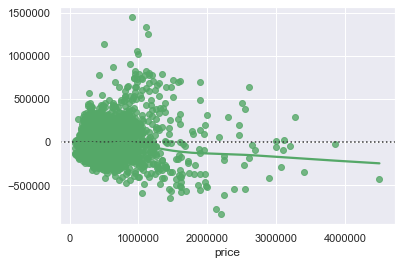

In [571]:
sns.residplot(x = y_test, y= y_test_pred, lowess=True, color = "g")

In [572]:
print(df.sqft_lot.mean())
abs(y_test-y_test_pred).idxmax()

15243.3998843262


4177

In [587]:
df.iloc[10067]

id                        3980300371
date             2014-09-26 00:00:00
price                         142000
bedrooms                           0
bathrooms                          0
sqft_living                      290
sqft_lot                       20875
floors                             1
waterfront                         0
view                               0
condition                          1
grade                              1
sqft_above                       290
sqft_basement                      0
yr_built                        1963
yr_renovated                       0
zipcode                        98024
lat                          47.5308
long                        -121.888
sqft_living15                   1620
sqft_lot15                     22850
old_charm                         57
cond_cat                      busted
has_basement                       0
season                             4
condtn_busted                      1
condtn_dope                        0
b

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [574]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df[features])
poly2_columns = poly_2.get_feature_names(df[features].columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)

In [575]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, df['price'], random_state=9,test_size=0.2)

In [576]:
scaler2 = StandardScaler()

scaler2.fit(X_train)

X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [577]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 195051.0867935838


In [578]:
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  195051 vs. Testing:  221571486799712896


In [584]:
abs(y_train-y_train_pred).idxmax()

14477

In [588]:
df.iloc[14477]

id                        3835500195
date             2014-06-18 00:00:00
price                      4.489e+06
bedrooms                           4
bathrooms                          3
sqft_living                     6430
sqft_lot                       27517
floors                             2
waterfront                         0
view                               0
condition                          3
grade                             12
sqft_above                      6430
sqft_basement                      0
yr_built                        2001
yr_renovated                       0
zipcode                        98004
lat                          47.6208
long                        -122.219
sqft_living15                   3720
sqft_lot15                     14592
old_charm                        228
cond_cat                        dope
has_basement                       0
season                             3
condtn_busted                      0
condtn_dope                        1
b

In [550]:
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly3_data = poly_3.fit_transform(df[features])
poly3_columns = poly_3.get_feature_names(df[features].columns)
df_poly3 = pd.DataFrame(poly3_data, columns=poly3_columns)

In [551]:
X_train, X_test, y_train, y_test = train_test_split(df_poly3, df['price'], random_state=6, test_size=0.2)
scaler3 = StandardScaler()
# fit the scaler to the training data
scaler3.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler3.transform(X_train), columns=df_poly3.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler3.transform(X_test), columns=df_poly3.columns)

In [552]:
# instantiate a linear regression object
lm_3 = LinearRegression()

#fit the linear regression to the data
lm_3 = lm_3.fit(X_train, y_train)

y_train_pred = lm_3.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [553]:
# use fitted model to predict on test data
y_pred = lm_3.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", "{:,}".format(test_rmse))

Testing Root Mean Squared Error: 7.672965695753446e+17
Training:  168167 vs. Testing:  7.672965695753446e+17


### Feature Selection

In [554]:
selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

/Users/browz/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=20, score_func=<function f_regression at 0x7f9f4d9afc80>)

In [555]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [556]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 218886.5298725637
Testing Root Mean Squared Error: 219385.22655916456


### Wrapper Method

In [557]:
ols = linear_model.LinearRegression()

In [558]:
selector = RFECV(estimator=ols, step=1, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

selector.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [ ]:
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])

trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))

print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

### Lasso

In [381]:
lasso = Lasso(alpha=800, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )

Training Error: 132648.12841614176
Testing Error: 199986.85170274737


/Users/browz/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309285912332.25, tolerance: 194982925380.51126
  positive)


## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/